In [ ]:
# Copyright (c) Microsoft Corporation. All rights reserved.
# Licensed under the MIT License.

# in this notebook, we try to modify mask matrix so that the hours with no obs is encoded as a vector of all zeros.

In [2]:
# activate line execution
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd

In [3]:
# import pandas as pd
# import os
# import numpy as np

# loc = 'train'
# dic={'time':-1,'Age':0,'Gender':1,'Height':2,'ICUType':3,'Weight':4,'Albumin':5,\
#              'ALP':6,'ALT':7,'AST':8,'Bilirubin':9,'BUN':10,'Cholesterol':11,'Creatinine':12,\
#              'DiasABP':13,'FiO2':14,'GCS':15,'Glucose':16,'HCO3':17,'HCT':18,'HR':19,\
#              'K':20,'Lactate':21,'Mg':22,'MAP':23,'MechVent':24,'Na':25,'NIDiasABP':26,\
#              'NIMAP':27,'NISysABP':28,'PaCO2':29,'PaO2':30,'pH':31,'Platelets':32,'RespRate':33,\
#              'SaO2':34,'SysABP':35,'Temp':36,'TroponinI':37,'TroponinT':38,'Urine':39,'WBC':40}
# column2drop = ['HR','NIDiasABP', 'NIMAP', 'NISysABP','RespRate', 'Temp','DiasABP','MAP','SysABP', 'GCS','TroponinT','TroponinI']
# dic = {key: value for key, value in dic.items() if key not in column2drop}
# dic = {key:(i-1) for i,key in enumerate(dic.keys())}
# def handle(loc):
#     dataPath = '../Multivariate-Time-Series-Imputation-with-Generative-Adversarial-Networks/set-a/{}/'.format(loc)
#     labelFile = '../Multivariate-Time-Series-Imputation-with-Generative-Adversarial-Networks/set-a/{}/list.txt'.format(loc)
#     data_lis = []
#     with open(labelFile, "r") as f:
#         line_num = 0
#         for line in f.readlines():
#             if line_num!=0:
#                 words = line.strip().split(',') 
#                 if os.path.isfile(os.path.join(dataPath, words[0]+".txt")):
#                     data_lis.append((words[0]+".txt", words[len(words)-1]))
#             line_num += 1   

#     print(len(data_lis))        
#     sta = []
#     dyn = []
#     lis = [x for x,y in dic.items()]
#     print(lis)
#     for fileName, label in data_lis:
#         with open(os.path.join(dataPath, fileName)) as f:
#             #read_csv is DataFrame, need to be transformed into ndarray
#             count=0
#             age=gender=height=icutype=weight=np.nan
#             lastTime=0
#             totalData=[]
#             for line in f.readlines():
#                 if count > 1:
#                     words=line.split(",")
#                     timestamp=words[0]
#                     feature=words[1]
#                     value=words[2]
#                     if feature in column2drop:
#                         continue
#                     # -1 is missing value
#                     if timestamp == "00:00":
#                         if feature=='Age':
#                             age=float(value)
#                             if age == -1: age = np.nan
#                         if feature=='Gender':
#                             gender=int(value)
#                             if gender == -1: gender = np.nan
#                         if feature=='Height':
#                             height=float(value)
#                             if height == -1: height = np.nan
#                         if feature == 'ICUType':
#                             icutype=int(value)
#                             if icutype == -1: icutype = np.nan
#                         if feature=='Weight':
#                             weight=float(value)
#                             if weight == -1: weight = np.nan
#                     else:
#                         if timestamp!=lastTime:
#                             data=[np.nan]*len(dic)
#                             hourandminute=timestamp.split(":")
#                             data[0]=float(hourandminute[0])*60+float(hourandminute[1])
#                             """
#                             data[1]=float(age)
#                             data[2]=float(gender)
#                             data[3]=float(height)
#                             data[4]=float(icutype)
#                             data[5]=float(weight)
#                             """
#                             if float(value)!=-1:
#                                 data[dic[feature]]=float(value)
#                             # if feature == 'Weight':
#                             #     assert float(value) == float(weight)
#                             totalData.append(data)
#                         else:
#                             totalData[len(totalData)-1][dic[feature]]=float(value)
#                     lastTime=timestamp

#                 count+=1
#         sta.append([age,gender,height,icutype,weight,int(label)])
#         d = np.array(totalData)
#         #for i in range(len(d)-1, 0, -1):
#         #    d[i][0]-=d[i-1][0]
#         d = pd.DataFrame(d, columns=lis)
#         dyn.append(d.drop(columns=['Age', 'Gender','Height','ICUType','Weight', 'WBC']))
        
#     sta = pd.DataFrame(np.array(sta), columns=['Age', 'Gender','Height','ICUType','Weight', 'Label'])
#     return sta,dyn

In [4]:
path_data_raw = "C:\\DATA\\data\\raw\\physionet_challenge_2012\\"
dfx = pd.read_csv(path_data_raw+'p12.csv')


# time conversion
dfx['Time'] = dfx['Time'].apply(lambda x:       int(x.split(':')[0]) + int(x.split(':')[1])/60      )

In [5]:
dfx[dfx.RecordID==132539]

Unnamed: 0       Time   Age   BUN  Creatinine   GCS  Gender  Glucose  \
0            0   0.000000  54.0   NaN         NaN   NaN     0.0      NaN   
1            1   0.116667   NaN   NaN         NaN  15.0     NaN      NaN   
2            2   0.616667   NaN   NaN         NaN   NaN     NaN      NaN   
3            3   1.616667   NaN   NaN         NaN   NaN     NaN      NaN   
4            4   2.616667   NaN   NaN         NaN   NaN     NaN      NaN   
5            5   3.133333   NaN   NaN         NaN   NaN     NaN      NaN   
6            6   3.616667   NaN   NaN         NaN  15.0     NaN      NaN   
7            7   4.616667   NaN   NaN         NaN   NaN     NaN      NaN   
8            8   5.616667   NaN   NaN         NaN   NaN     NaN      NaN   
9            9   7.616667   NaN   NaN         NaN  15.0     NaN      NaN   
10          10   8.616667   NaN   NaN         NaN   NaN     NaN      NaN   
11          11   9.616667   NaN   NaN         NaN   NaN     NaN      NaN   
12          12  10.616667   NaN  13.0         0.8   NaN     NaN    205.0   
13          13  11.616667   NaN   NaN         NaN  15.0     NaN      NaN   
14          14  12.616667   NaN   NaN         NaN   NaN     NaN      NaN   
15          15  13.616667   NaN   NaN         NaN   NaN     NaN      NaN   
16          16  14.616667   NaN   NaN         NaN   NaN     NaN      NaN   
17          17  15.616667   NaN   NaN         NaN  15.0     NaN      NaN   
18          18  16.616667   NaN   NaN         NaN   NaN     NaN      NaN   
19          19  17.616667   NaN   NaN         NaN   NaN     NaN      NaN   
20          20  18.616667   NaN   NaN         NaN   NaN     NaN      NaN   
21          21  19.616667   NaN   NaN         NaN  15.0     NaN      NaN   
22          22  20.616667   NaN   NaN         NaN   NaN     NaN      NaN   
23          23  21.616667   NaN   NaN         NaN   NaN     NaN      NaN   
24          24  22.616667   NaN   NaN         NaN   NaN     NaN      NaN   
25          25  23.616667   NaN   NaN         NaN  15.0     NaN      NaN   
26          26  24.616667   NaN   NaN         NaN   NaN     NaN      NaN   
27          27  25.616667   NaN   NaN         NaN   NaN     NaN      NaN   
28          28  26.616667   NaN   NaN         NaN   NaN     NaN      NaN   
29          29  27.616667   NaN   NaN         NaN  15.0     NaN      NaN   
30          30  28.616667   NaN   NaN         NaN   NaN     NaN      NaN   
31          31  29.616667   NaN   NaN         NaN   NaN     NaN      NaN   
32          32  30.616667   NaN   NaN         NaN   NaN     NaN      NaN   
33          33  31.616667   NaN   NaN         NaN  14.0     NaN      NaN   
34          34  32.616667   NaN   NaN         NaN   NaN     NaN      NaN   
35          35  33.116667   NaN   8.0         0.7   NaN     NaN    115.0   
36          36  33.616667   NaN   NaN         NaN   NaN     NaN      NaN   
37          37  34.616667   NaN   NaN         NaN   NaN     NaN      NaN   
38          38  35.616667   NaN   NaN         NaN  15.0     NaN      NaN   
39          39  36.616667   NaN   NaN         NaN   NaN     NaN      NaN   
40          40  37.616667   NaN   NaN         NaN   NaN     NaN      NaN   
41          41  38.616667   NaN   NaN         NaN   NaN     NaN      NaN   
42          42  39.616667   NaN   NaN         NaN  15.0     NaN      NaN   
43          43  40.616667   NaN   NaN         NaN   NaN     NaN      NaN   
44          44  41.616667   NaN   NaN         NaN   NaN     NaN      NaN   
45          45  42.616667   NaN   NaN         NaN   NaN     NaN      NaN   
46          46  43.616667   NaN   NaN         NaN  15.0     NaN      NaN   
47          47  44.616667   NaN   NaN         NaN   NaN     NaN      NaN   
48          48  45.616667   NaN   NaN         NaN   NaN     NaN      NaN   
49          49  46.616667   NaN   NaN         NaN   NaN     NaN      NaN   
50          50  47.616667   NaN   NaN         NaN  15.0     NaN      NaN   

    HCO3   HCT  ...  Cholesterol  TroponinI  Tropon

In [6]:
# ORIGINAL
import pandas as pd
import os
import numpy as np

loc = 'train'
dic={'time':-1,'Age':0,'Gender':1,'Height':2,'ICUType':3,'Weight':4,'Albumin':5,\
             'ALP':6,'ALT':7,'AST':8,'Bilirubin':9,'BUN':10,'Cholesterol':11,'Creatinine':12,\
             'DiasABP':13,'FiO2':14,'GCS':15,'Glucose':16,'HCO3':17,'HCT':18,'HR':19,\
             'K':20,'Lactate':21,'Mg':22,'MAP':23,'MechVent':24,'Na':25,'NIDiasABP':26,\
             'NIMAP':27,'NISysABP':28,'PaCO2':29,'PaO2':30,'pH':31,'Platelets':32,'RespRate':33,\
             'SaO2':34,'SysABP':35,'Temp':36,'TroponinI':37,'TroponinT':38,'Urine':39,'WBC':40}
column2drop = ['HR','NIDiasABP', 'NIMAP', 'NISysABP','RespRate', 'Temp','DiasABP','MAP','SysABP', 'GCS','TroponinT','TroponinI','Urine']
dic = {key: value for key, value in dic.items() if key not in column2drop}
dic = {key:(i-1) for i,key in enumerate(dic.keys())}

def handle(loc):
    dataPath = '../Multivariate-Time-Series-Imputation-with-Generative-Adversarial-Networks/set-a/{}/'.format(loc)
    labelFile = '../Multivariate-Time-Series-Imputation-with-Generative-Adversarial-Networks/set-a/{}/list.txt'.format(loc)
    data_lis = []
    with open(labelFile, "r") as f:
        line_num = 0
        for line in f.readlines():
            if line_num!=0:
                words = line.strip().split(',') 
                if os.path.isfile(os.path.join(dataPath, words[0]+".txt")):
                    data_lis.append((words[0]+".txt", words[len(words)-1]))
            line_num += 1   

    print(len(data_lis))        
    sta = []
    dyn = []
    lis = [x for x,y in dic.items()]
    print(lis)
    for fileName, label in data_lis:
        with open(os.path.join(dataPath, fileName)) as f:
            #read_csv is DataFrame, need to be transformed into ndarray
            count=0
            age=gender=height=icutype=weight=np.nan
            lastTime=0
            totalData=[]
            for line in f.readlines():
                if count > 1:
                    words=line.split(",")
                    timestamp=words[0]
                    feature=words[1]
                    value=words[2]
                    if feature=='Urine':
                        a=1
                    if feature in column2drop:
                        continue
                    # -1 is missing value
                    if timestamp == "00:00":
                        if feature=='Age':
                            age=float(value)
                            if age == -1: age = np.nan
                        if feature=='Gender':
                            gender=int(value)
                            if gender == -1: gender = np.nan
                        if feature=='Height':
                            height=float(value)
                            if height == -1: height = np.nan
                        if feature == 'ICUType':
                            icutype=int(value)
                            if icutype == -1: icutype = np.nan
                        if feature=='Weight':
                            weight=float(value)
                            if weight == -1: weight = np.nan
                    else:
                        if timestamp!=lastTime:
                            data=[np.nan]*len(dic)
                            hourandminute=timestamp.split(":")
                            data[0]=float(hourandminute[0])*60+float(hourandminute[1])
                            data[0]= float(data[0]/60)
                            # data[0]=int(hourandminute[0])*int(hourandminute[1])/60
                            """
                            data[1]=float(age)
                            data[2]=float(gender)
                            data[3]=float(height)
                            data[4]=float(icutype)
                            data[5]=float(weight)
                            """
                            if feature=='TroponinT':
                                a=1
                            if float(value)!=-1:
                                data[dic[feature]+1]=float(value)
                            # if feature == 'Weight':
                            #     assert float(value) == float(weight)
                            totalData.append(data)
                        else:
                            totalData[len(totalData)-1][dic[feature]+1]=float(value)
                    lastTime=timestamp

                count+=1
        if '132539' in fileName:
            a=1
        if len(totalData)==0:
            continue
        d = np.array(totalData)
        #for i in range(len(d)-1, 0, -1):
        #    d[i][0]-=d[i-1][0]
        d2 = pd.DataFrame(d, columns=lis)
        d2 = d2.drop(columns=['Age', 'Gender','Height','ICUType','Weight'])
        t = d2.iloc[:,1:].notnull().sum(axis=1)>0
        d2 = d2.loc[t]
        if len(d2)==0:
            continue
        dyn.append(d2)
        sta.append([age,gender,height,icutype,weight,int(label)])
        
    sta = pd.DataFrame(np.array(sta), columns=['Age', 'Gender','Height','ICUType','Weight', 'Label'])
    return sta,dyn

In [7]:
sta,dyn=handle('train')

3594
['time', 'Age', 'Gender', 'Height', 'ICUType', 'Weight', 'Albumin', 'ALP', 'ALT', 'AST', 'Bilirubin', 'BUN', 'Cholesterol', 'Creatinine', 'FiO2', 'Glucose', 'HCO3', 'HCT', 'K', 'Lactate', 'Mg', 'MechVent', 'Na', 'PaCO2', 'PaO2', 'pH', 'Platelets', 'SaO2', 'WBC']


In [8]:
sta

Age  Gender  Height  ICUType  Weight  Label
0     54.0     0.0     NaN      4.0     NaN    0.0
1     76.0     1.0   175.3      2.0    76.0    0.0
2     44.0     0.0     NaN      3.0    56.7    0.0
3     68.0     1.0   180.3      3.0    84.6    0.0
4     88.0     0.0     NaN      3.0     NaN    0.0
...    ...     ...     ...      ...     ...    ...
3573  39.0     1.0   177.8      3.0    87.1    0.0
3574  58.0     0.0     NaN      1.0   102.8    0.0
3575  90.0     1.0     NaN      3.0    78.0    0.0
3576  56.0     0.0   170.2      2.0   131.2    0.0
3577  85.0     0.0   166.4      2.0    69.5    0.0

[3578 rows x 6 columns]

In [9]:
[x.notnull().sum(axis=1).values for x in dyn]

[array([ 2, 11, 11], dtype=int64),
 array([ 4,  6,  4,  3,  7,  3,  5,  2,  2,  5,  3,  5,  2,  2,  2,  3, 11,
         2,  2,  5, 11,  5,  3], dtype=int64),
 array([16,  2,  3,  2, 16,  3,  5,  2,  2,  3,  3,  3,  3,  3,  4,  3,  4,
         3,  4,  2,  3,  4,  4,  3, 11,  3,  3], dtype=int64),
 array([16,  2, 11,  2,  2, 11,  2], dtype=int64),
 array([11,  2,  3,  2,  3, 12,  2], dtype=int64),
 array([11,  3,  4,  2,  6,  3,  5,  2,  3,  5,  7,  3,  3,  5,  4,  3,  4,
         7,  3,  3,  5,  7,  3,  4,  3,  5, 11,  3], dtype=int64),
 array([10,  5, 10, 11], dtype=int64),
 array([ 5, 16,  4, 11,  6,  5,  5,  5,  3,  5,  3,  4,  3,  7,  5,  3,  7,
         5,  3,  3, 13,  5,  3,  5,  2,  3,  4,  3,  5,  3,  5],
       dtype=int64),
 array([11,  8], dtype=int64),
 array([ 4,  3,  4,  5,  4,  2,  2,  2,  4,  4,  4,  5,  2,  2,  5,  5, 11,
         2,  2, 11], dtype=int64),
 array([16, 11,  2,  5, 11,  2], dtype=int64),
 array([ 4,  3,  5,  5,  2,  2,  2,  5,  2, 10,  5, 11], dtype=int64

In [10]:
# dic={'time':-1,'Age':0,'Gender':1,'Height':2,'ICUType':3,'Weight':4,'Albumin':5,\
#              'ALP':6,'ALT':7,'AST':8,'Bilirubin':9,'BUN':10,'Cholesterol':11,'Creatinine':12,\
#              'DiasABP':13,'FiO2':14,'GCS':15,'Glucose':16,'HCO3':17,'HCT':18,'HR':19,\
#              'K':20,'Lactate':21,'Mg':22,'MAP':23,'MechVent':24,'Na':25,'NIDiasABP':26,\
#              'NIMAP':27,'NISysABP':28,'PaCO2':29,'PaO2':30,'pH':31,'Platelets':32,'RespRate':33,\
#              'SaO2':34,'SysABP':35,'Temp':36,'TroponinI':37,'TroponinT':38,'Urine':39,'WBC':40}

# column2drop = ['HR','NIDiasABP', 'NIMAP', 'NISysABP','RespRate', 'Temp','DiasABP','MAP','SysABP', 'GCS']

# dyn[0].shape
# dyn[0].notnull().sum(axis=1).values
# dyn = [x.drop(columns=column2drop).dropna(how='all') for x in dyn]

dyn[0].shape
dyn[0].notnull().sum(axis=1).values


(3, 24)

array([ 2, 11, 11], dtype=int64)

In [11]:
aa=dyn[0]
aa.columns
aa['WBC']
aa.head(5)

Index(['time', 'Albumin', 'ALP', 'ALT', 'AST', 'Bilirubin', 'BUN',
       'Cholesterol', 'Creatinine', 'FiO2', 'Glucose', 'HCO3', 'HCT', 'K',
       'Lactate', 'Mg', 'MechVent', 'Na', 'PaCO2', 'PaO2', 'pH', 'Platelets',
       'SaO2', 'WBC'],
      dtype='object')

0     NaN
1    11.2
2     9.4
Name: WBC, dtype: float64

time  Albumin  ALP  ALT  AST  Bilirubin   BUN  Cholesterol  \
0   3.133333      NaN  NaN  NaN  NaN        NaN   NaN          NaN   
1  10.616667      NaN  NaN  NaN  NaN        NaN  13.0          NaN   
2  33.116667      NaN  NaN  NaN  NaN        NaN   8.0          NaN   

   Creatinine  FiO2  ...  Lactate   Mg  MechVent     Na  PaCO2  PaO2  pH  \
0         NaN   NaN  ...      NaN  NaN       NaN    NaN    NaN   NaN NaN   
1         0.8   NaN  ...      NaN  1.5       NaN  137.0    NaN   NaN NaN   
2         0.7   NaN  ...      NaN  1.9       NaN  136.0    NaN   NaN NaN   

   Platelets  SaO2   WBC  
0        NaN   NaN   NaN  
1      221.0   NaN  11.2  
2      185.0   NaN   9.4  

[3 rows x 24 columns]

In [12]:
aa.notnull().sum(axis=1)
aa.head(5)


0     2
1    11
2    11
dtype: int64

time  Albumin  ALP  ALT  AST  Bilirubin   BUN  Cholesterol  \
0   3.133333      NaN  NaN  NaN  NaN        NaN   NaN          NaN   
1  10.616667      NaN  NaN  NaN  NaN        NaN  13.0          NaN   
2  33.116667      NaN  NaN  NaN  NaN        NaN   8.0          NaN   

   Creatinine  FiO2  ...  Lactate   Mg  MechVent     Na  PaCO2  PaO2  pH  \
0         NaN   NaN  ...      NaN  NaN       NaN    NaN    NaN   NaN NaN   
1         0.8   NaN  ...      NaN  1.5       NaN  137.0    NaN   NaN NaN   
2         0.7   NaN  ...      NaN  1.9       NaN  136.0    NaN   NaN NaN   

   Platelets  SaO2   WBC  
0        NaN   NaN   NaN  
1      221.0   NaN  11.2  
2      185.0   NaN   9.4  

[3 rows x 24 columns]

In [13]:
dyn[0].notnull().sum(axis=1).values
dyn[2].Lactate.values

array([ 2, 11, 11], dtype=int64)

array([nan, 1.3, nan, nan, nan, nan, nan, nan, 1.9, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, 0.9, nan, nan, nan, nan, nan, nan,
       nan])

(array([2.73546674e-02, 1.85508664e-02, 2.08566238e-02, 2.42104528e-02,
        1.70486305e-02, 9.08328675e-03, 4.47177194e-03, 2.16601453e-03,
        5.24035774e-04, 5.24035774e-04, 1.39742873e-04, 3.49357183e-05,
        3.49357183e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
         88.,  96., 

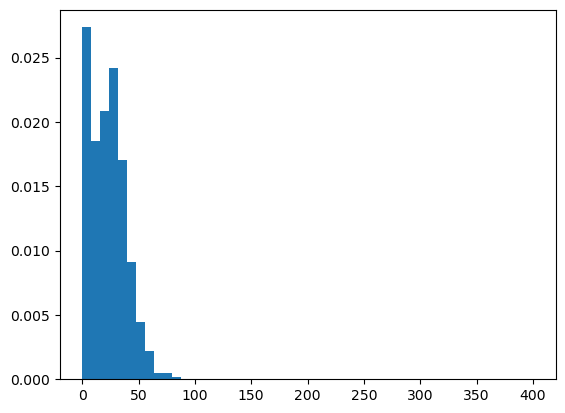

In [14]:
sta_types = ['int', 'binary', 'continuous', 'categorical','continuous','binary', 'int']
dyn_types = ['continuous']*len(dyn[0].columns)
dynamics = pd.concat(dyn)
seq_len = [len(x) for x in dyn]
sta["seq_len"]=np.array(seq_len)

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(seq_len, range=(0,400), bins=50, density=True)
plt.show()

In [15]:
from general.missingprocessor import Processor
d_P = Processor(dyn_types, use_pri='time')
s_P = Processor(sta_types)
d_P.fit(dynamics)
s_P.fit(sta)

time 1 None continuous None
IGNORE
Albumin 1 0.9742345904920973 continuous None
IGNORE
all values are integer
ALP 1 0.9658835521387255 int None
IGNORE
all values are integer
ALT 1 0.9649502007933486 int None
IGNORE
all values are integer
AST 1 0.9648887960995739 int None
IGNORE
Bilirubin 1 0.9647291438957594 continuous None
IGNORE
BUN 1 0.8460215898903313 continuous None
IGNORE
all values are integer
Cholesterol 1 0.9965858990261216 int None
IGNORE
Creatinine 1 0.845198766993749 continuous None
IGNORE
FiO2 1 0.6436317192086163 continuous None
IGNORE
all values are integer
Glucose 1 0.856141083424417 int None
IGNORE
HCO3 1 0.8494234099254547 continuous None
IGNORE
HCT 1 0.7972539820943912 continuous None
IGNORE
K 1 0.8405442912056198 continuous None
IGNORE
Lactate 1 0.9108526655777568 continuous None
IGNORE
Mg 1 0.8497304333943286 continuous None
IGNORE
all values are integer
MechVent 1 0.6558512532698 int None
IGNORE
all values are integer
Na 1 0.8501971090670171 int None
IGNORE
PaCO2 

In [16]:
def build_dataset(sta, dyn, seq_len):
    s = s_P.transform(sta)
    d_lis=[d_P.transform(ds) for ds in dyn]
    d = [x[0].tolist() for x in d_lis]
    lag = [x[1].tolist() for x in d_lis]
    mask = [x[2].tolist() for x in d_lis]
    times = [x[-1].tolist() for x in d_lis]
    priv = [x[3].tolist() for x in d_lis]
    nex = [x[4].tolist() for x in d_lis]
    label = [float(x[-2]) for x in s] 
    from fastNLP import DataSet
    dataset = DataSet({"seq_len": seq_len, 
                       "dyn": d, "lag":lag, "mask": mask,
                       "sta": s, "times":times, "priv":priv, "nex":nex, "label": label
                      })
    return dataset

dataset = build_dataset(sta, dyn, seq_len)

## transform timegaps

In [17]:
# import torch
np_times = [np.array(x['times']) for x in dataset]


In [18]:
dyn[3]


time  Albumin    ALP   ALT   AST  Bilirubin   BUN  Cholesterol  \
0    0.183333      4.4  105.0  12.0  15.0        0.2  23.0          NaN   
14   2.683333      NaN    NaN   NaN   NaN        NaN   NaN          NaN   
21   8.716667      NaN    NaN   NaN   NaN        NaN  20.0          NaN   
27  14.516667      NaN    NaN   NaN   NaN        NaN   NaN          NaN   
35  21.150000      NaN    NaN   NaN   NaN        NaN   NaN          NaN   
48  32.100000      NaN    NaN   NaN   NaN        NaN  10.0          NaN   
61  43.716667      NaN    NaN   NaN   NaN        NaN   NaN          NaN   

    Creatinine  FiO2  ...  Lactate   Mg  MechVent     Na  PaCO2  PaO2  pH  \
0          0.9   NaN  ...      NaN  2.1       NaN  140.0    NaN   NaN NaN   
14         NaN   NaN  ...      NaN  NaN       NaN    NaN    NaN   NaN NaN   
21         0.7   NaN  ...      NaN  2.1       NaN  141.0    NaN   NaN NaN   
27         NaN   NaN  ...      NaN  NaN       NaN    NaN    NaN   NaN NaN   
35         NaN   NaN  ...      NaN  NaN       NaN    NaN    NaN   NaN NaN   
48         0.7   NaN  ...      NaN  1.9       NaN  137.0    NaN   NaN NaN   
61         NaN   NaN  ...      NaN  NaN       NaN    NaN    NaN   NaN NaN   

    Platelets  SaO2   WBC  
0       391.0   NaN  11.5  
14        NaN   NaN   NaN  
21      315.0   NaN   8.8  
27        NaN   NaN   NaN  
35        NaN   NaN   NaN  
48      284.0   NaN   7.9  
61        NaN   NaN   NaN  

[7 rows x 24 columns]

In [19]:
i=3

np_times[i].flatten()
np.diff(np_times[i].flatten(),prepend=0)

array([0.00381944, 0.05590278, 0.18159722, 0.30243056, 0.440625  ,
       0.66875   , 0.91076389])

array([0.00381944, 0.05208333, 0.12569444, 0.12083333, 0.13819444,
       0.228125  , 0.24201389])

In [20]:
dts = np.concatenate([  np.diff(x.flatten(),prepend=0) for x in np_times])

In [21]:
dts.shape

(81427,)

In [22]:
dts.min(), dts.max(), dts.mean(), dts.std(), np.median(dts)

(0.0003472222222221655,
 0.789236111111111,
 0.03936622509869099,
 0.05861249757127682,
 0.020833333333333315)

In [24]:
dts.shape
dts.min(), dts.max(), dts.mean(), dts.std()

# plotly histogram of dts
df = pd.DataFrame(dts, columns=['dt'])
df['dt'].value_counts()
import plotly.express as px
fig = px.histogram(df, x="dt")
fig.show()

from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer

# power transform
pt = PowerTransformer(method='yeo-johnson', standardize=True)
pt = StandardScaler()
dts2 = pt.fit_transform(dts.reshape(-1, 1))
df['dt_transformed'] = dts2

# now save the transformer
import pickle
with open("./data/physio_data/physio_dt_transformer.pkl", "wb") as f:
    pickle.dump(pt, f)

fig = px.histogram(df, x="dt_transformed")
fig.show()

(81427,)

(0.0003472222222221655,
 0.789236111111111,
 0.03936622509869099,
 0.05861249757127682)

0.020833    1697
0.020833    1095
0.041667    1011
0.062500    1009
0.015625     847
            ... 
0.457292       1
0.245833       1
0.071181       1
0.144444       1
0.157986       1
Name: dt, Length: 5062, dtype: int64

In [24]:
pt.transform([[1.889]])


array([[-0.00020573]])

In [25]:
test_sta, test_dyn = handle('test')
test_seq_len = [len(x) for x in test_dyn]
test_sta["seq_len"]=np.array(test_seq_len)
val_set = build_dataset(test_sta, test_dyn, test_seq_len)

400
['time', 'Age', 'Gender', 'Height', 'ICUType', 'Weight', 'Albumin', 'ALP', 'ALT', 'AST', 'Bilirubin', 'BUN', 'Cholesterol', 'Creatinine', 'FiO2', 'Glucose', 'HCO3', 'HCT', 'K', 'Lactate', 'Mg', 'MechVent', 'Na', 'PaCO2', 'PaO2', 'pH', 'Platelets', 'SaO2', 'WBC']


In [26]:
finaldic = {
    "train_set": dataset,
    'raw_set': (sta,dyn),
    'test_set': (test_sta,test_dyn),
    'val_set': val_set,
    "dynamic_processor": d_P,
    "static_processor":s_P
}
import pickle
from utils.general import make_sure_path_exists
make_sure_path_exists("./data/physio_data/")
with open("./data/physio_data/full2012_v4.pkl", "wb") as f:
    pickle.dump(finaldic, f)


In [27]:
with open("./data/physio_data/full2012.pkl", "rb") as f:
    dataset = pickle.load(f)

In [29]:
train_set = dataset["train_set"]

train_set.set_input("dyn", "mask", "sta", "times", "lag",
                        "seq_len", "priv", "nex", "label")

+---------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------+
| seq_len | dyn          | lag          | mask         | sta          | times        | priv         | nex          | label |
+---------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------+
| 50      | [[0.0, 0.... | [[0.00243... | [[0.0, 0.... | [0.52 0. ... | [[0.00243... | [[0.0, 0.... | [[0.0, 0.... | 0.0   |
| 93      | [[0.0, 0.... | [[0.01458... | [[0.0, 0.... | [0.813333... | [[0.01458... | [[0.0, 0.... | [[0.0, 0.... | 0.0   |
| 70      | [[0.0, 0.... | [[0.00069... | [[0.0, 0.... | [0.386666... | [[0.00069... | [[0.0, 0.... | [[0.0, 0.... | 0.0   |
| 68      | [[0.04240... | [[0.00381... | [[1.0, 1.... | [0.706666... | [[0.00381... | [[0.0, 0.... | [[0.0, 0.... | 0.0   |
| 50      | [[0.0, 0.... | [[0.04791... | [[0.0, 0.... | [0.973333... | [[0.04791... | [[0.0, 0.... | [[0.0, 0.... | 0.0   |


In [32]:
d = np.array(train_set[0]['dyn'])

In [38]:
d.shape
d[:,-5]

(50, 35)

array([0.88313854, 0.89148581, 0.        , 0.        , 0.        ,
       0.92821372, 0.        , 0.        , 0.93322206, 0.        ,
       0.        , 0.        , 0.92487478, 0.        , 0.        ,
       0.        , 0.91318864, 0.        , 0.        , 0.        ,
       0.91986644, 0.        , 0.        , 0.        , 0.91652757,
       0.        , 0.        , 0.        , 0.92988312, 0.        ,
       0.        , 0.        , 0.93322206, 0.        , 0.        ,
       0.        , 0.        , 0.93489146, 0.        , 0.        ,
       0.        , 0.92988312, 0.        , 0.        , 0.        ,
       0.92487478, 0.        , 0.        , 0.        , 0.92821372])